In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [5]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [13]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])
numerical_features.head()  # Display the selected numerical features

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,55,1,1,0,0,0,1,1
1,80,1,1,0,0,0,1,0
2,80,1,1,1,0,0,1,1
3,80,1,1,1,0,0,1,0
4,80,1,1,1,0,0,1,0


In [15]:
correlation_matrix = numerical_features.corr()
correlation_matrix # Display the correlation matrix

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Y,0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


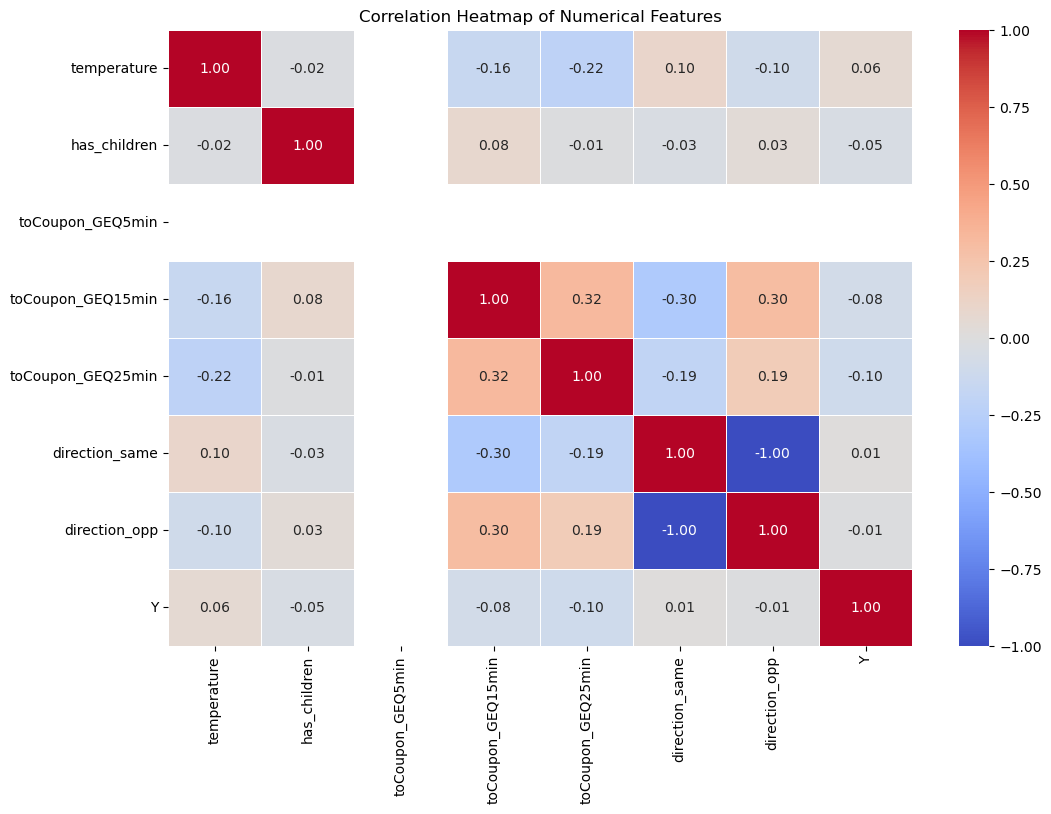

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # Generate heatmap

plt.title('Correlation Heatmap of Numerical Features')   # Display the heatmap
plt.show()


In [19]:
highly_correlated_pairs = []
threshold = 0.8

# Loop through the correlation matrix to find highly correlated pairs
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if abs(correlation_matrix.loc[row, col]) > threshold and row != col:
            highly_correlated_pairs.append((row, col, correlation_matrix.loc[row, col]))

highly_correlated_pairs # Display the highly correlated pairs


[('direction_opp', 'direction_same', -1.0),
 ('direction_same', 'direction_opp', -1.0)]

In [21]:
features_to_drop = [pair[1] for pair in highly_correlated_pairs]

# for duplicate features
selected_features = numerical_features.drop(columns=features_to_drop)

# Display the selected features after highly correlated ones
selected_features.head()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,Y
0,55,1,1,0,0,1
1,80,1,1,0,0,0
2,80,1,1,1,0,1
3,80,1,1,1,0,0
4,80,1,1,1,0,0
